In [1]:
import pandas as pd
import numpy as np
import scipy
import statistics as st
from statistics import mean
from statistics import median
from statistics import variance
import statsmodels.api
from scipy import stats
from statsmodels.formula.api import ols
import math
import scipy.stats as scst
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid") # make the plot (like histogram) has clearer looking
import statsmodels.api as sm
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans, ttest_ind
from scipy.stats.mstats import winsorize


In [2]:
oldcars = pd.read_csv (r"C:/Data/oldcars.csv",sep = ",")
oldcars
# sample size is 301

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Qa
Report the number of cars using Diesel and number of cars using Petrol.

In [3]:
print(oldcars['Fuel_Type'].value_counts())
# 239 Petrol
# 60 Diesel

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [4]:
# can use pd.crosstab() as below to get the answer

print(pd.crosstab(index=oldcars["Fuel_Type"],columns="count") )

col_0      count
Fuel_Type       
CNG            2
Diesel        60
Petrol       239


# Qb
Report the number of cars that have manual transmission type.

In [5]:
print(oldcars.Transmission.value_counts())
# 261 Manual

Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Qc
 Report the sample mean and the sample 20% trimmed mean of the selling price.  
 What is the difference of these two means?  
 From this difference, conclude if the distribution of selling price is symmetric or not.  Why and why not?

In [6]:
print(mean(oldcars['Selling_Price'])) #4.6613
print( scst.trim_mean(oldcars['Selling_Price'], 0.2) ) # 20% trimmed mean, 3.54376
diff = mean(oldcars['Selling_Price']) - scst.trim_mean(oldcars['Selling_Price'], 0.2)
print(diff) # 1.1175
# 1.117539/4.6613 = 0.2397486
# That means the original mean is dropped around 24% after trimming.
# That quite large drop suggests the selling price has a non-symmetric distribution.

4.661295681063123
3.543756906077348
1.1175387749857753


# Qd
Plot scatter plot of selling price and present price.
Calculate the correlation coefficient value.
Comment.

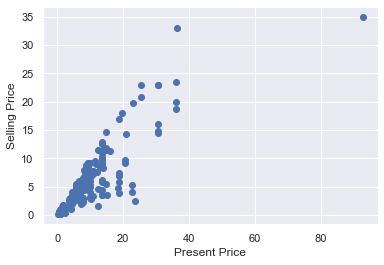

In [7]:
plt.scatter(oldcars['Present_Price'], oldcars['Selling_Price'],color='b')  
plt.xlabel('Present Price') 
plt.ylabel('Selling Price') 
#plt.title('Scatter Plot of ...') 
plt.show() 

In [8]:
# correlation coefficient: 
print(np.corrcoef(oldcars['Present_Price'], oldcars['Selling_Price'])[0, 1] )
# 0.8789825451614951
# comment: the scatter plot shows a positive relationship and might be linear.
# There are few points that could be outliers.


0.8789825451614951


# Qe
Write the code to check the normality of the selling price of the cars using Petrol (usingplot(s) and normality test).  
Give your comment

In [9]:
sell = oldcars['Selling_Price'] # extract the column "Selling_Price" from the data
Petrol = sell[(oldcars['Fuel_Type'] == 'Petrol')] # selling price of Petrol cars
Diesel = sell[(oldcars['Fuel_Type'] == 'Diesel')] # Selling price of Diesel cars

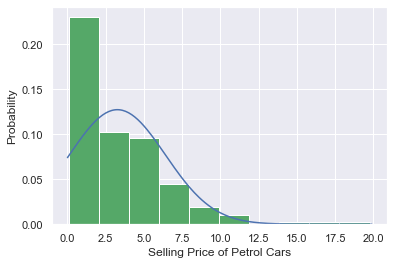

In [10]:
# checking  the  normality includes:
# histogram with normal density curve
# QQ plot
# Shapiro Wilk test

l = list(np.arange(0,20,0.1)) # min is 0.1 and max is 19.75, range (0,20) is enough
y = scst.norm.pdf(l,loc = mean(Petrol),scale = st.stdev(Petrol)) # this equivalent to qnorm in R
plt.plot(l, y)
plt.hist(Petrol, range=None, density=True, color='C2') 
plt.xlabel('Selling Price of Petrol Cars') 
plt.ylabel('Probability') 
plt.show()
# histogram looks obviously skewed (long right tail)

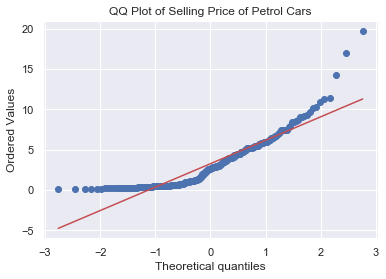

In [11]:
#QQ plot
import pylab
scst.probplot(Petrol, dist="norm", plot=pylab)
pylab.title('QQ Plot of Selling Price of Petrol Cars') 
pylab.show()
# both tails are not normal.
# NOTE: Sample quantiles in y-axis and Theoretical quantiles in x-axis. This is opposite from lecture notes.
# Hence, the right tail ABOVE straight line suggests LONGER than normal.

In [12]:
# Shapiro Wilk test for the normality of Petrol,
print(scst.shapiro(Petrol))

# p- value = 1.50893244432607e-14, hence it's NOT normal.

(0.8486546277999878, 1.50893244432607e-14)


In [ ]:
#comments: Selling price of Petrol cars is NOT normally distributed 
# from histogram with very right skewed, QQ plot with both tails not normal
# and Shapiro-Wilk test with extremely small p-value

# Qf
Write the code to check the normality of the selling price of the cars using Diesel (usingplot(s) and normality test).  
Give your comment.

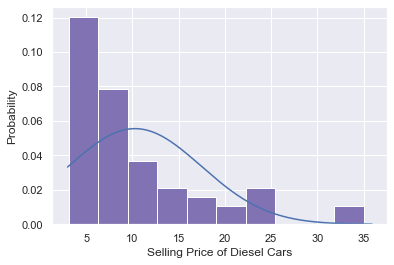

In [13]:
# check  the  normality  of  the  selling price of Diesel cars
# Similar as in Q5, using hostogram, QQ plot and Shapiro Wilk test

l = list(np.arange(3,36,0.1)) # min is 3.1 and max is 35, range (3, 36) is enough
y = scst.norm.pdf(l,loc = mean(Diesel),scale = st.stdev(Diesel)) 
plt.plot(l, y)
plt.hist(Diesel, range=None, density=True, color='C4') 
plt.xlabel('Selling Price of Diesel Cars') 
plt.ylabel('Probability') 
plt.show()
# histogram is obviously skewed. 

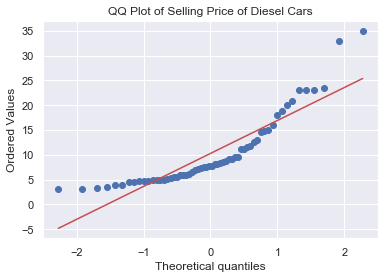

In [14]:
# QQ plot
import pylab
scst.probplot(Diesel, dist="norm", plot=pylab)
pylab.title('QQ Plot of Selling Price of Diesel Cars') 
pylab.show()
# both tails are not normal (shorter/lighter/thinner than normal)

In [15]:
# Shapiro Wilk test for the normality of Diesel
print(scst.shapiro(Diesel))

# p- value = 3.6e-07, hence it's NOT normal.

(0.816650927066803, 3.600152922444977e-07)


In [ ]:
#comments: Selling price of Diesel cars is NOT normally distributed 
# from histogram with very right skewed, QQ plot with both tails not normal
# and Shapiro-Wilk test with extremely small p-value

# Qg
Compare the average selling price of Petrol cars and Diesel cars.

General guide: Though data distribution are not normal, however the size of each sample is large 
(60 Diesel and 239 Petrol) and two samples are independent, we can use t-test for the comparison.
We need to determine if the two samples have equal variance by Levene test because both of them are NOT normal.

In [16]:
# Test if the variances are the same

Levene, p = scipy.stats.levene(Petrol, Diesel)
#print(Levene) # test statisics
print('p-value of Levene test is: ',p) # p-value = 6.81e-08

# Since both samples are NOT normal, we use Levene test to test the equality of variance.
# At alpha = 0.05, conclude: UNequal variances

p-value of Levene test is:  6.807902241792097e-08


# Qg(i): 
(1) 2 samples are independent,

(2) Both samples are not normal, 

(3) Each sample has large size hence, can use t-test,

(4) Variances are not equal hence use t-test with unequal variances

(5) One-sided test to check if Diesel - Petrol >0

# Qg(ii)

In [17]:
# Test 1
import statsmodels.api
Test1, p, df = statsmodels.stats.weightstats.ttest_ind(Diesel, Petrol, alternative='larger', usevar='unequal', value=0)
print('Test statistic = ', Test1) # report the test statistic only, 7.387
print('p-value is ',p) # report the p-value only, 1.826e-10
#print('degree of freedom ', df) # optional to print or not

# Conclusion: p-value = 1.826e-10 < alpha = 0.01.
# Reject Ho. The average selling price of Diesel cars is more expensivive than that of Petrol cars.

Test statistic =  7.38726365732148
p-value is  1.8261698030146747e-10
